In [2]:
import librosa  
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import noisereduce as nr
from jupyterthemes import jtplot

In [3]:
jtplot.style(theme='monokai', context='notebook', ticks=True, gridlines='--')

In [4]:
wavFolder = os.path.join("bird_data","wav_files")
wavFiles = os.listdir(wavFolder)
test = os.path.join(wavFolder, wavFiles[0])

In [5]:
train_folder = os.path.join("bird_data","train")
test_folder = os.path.join("bird_data","test")

In [6]:
audioData = pd.read_csv(os.path.join("bird_data", "audioData_wav_.csv"))

In [7]:
audioData.head()

,American_Goldfinch,American_Robin,Barn_Swallow,Blue_Jay,Blue-grey_Gnatcatcher,Carolina_Chickadee,Carolina_Wren,Cedar_Waxwing,Northern_Cardinal,Ruby-crowned_Kinglet
0,American_Goldfinch_XC114342.wav,American_Robin_XC112597.wav,Barn_Swallow_XC113501.wav,Blue_Jay_XC110056.wav,Blue-grey_Gnatcatcher_XC130506.wav,Carolina_Chickadee_XC111140.wav,Carolina_Wren_XC112512.wav,Cedar_Waxwing_XC121795.wav,Northern_Cardinal_XC110059.wav,Ruby-crowned_Kinglet_XC131366.wav
1,American_Goldfinch_XC124312.wav,American_Robin_XC114082.wav,Barn_Swallow_XC123032.wav,Blue_Jay_XC114085.wav,Blue-grey_Gnatcatcher_XC130507.wav,Carolina_Chickadee_XC112508.wav,Carolina_Wren_XC116314.wav,Cedar_Waxwing_XC121796.wav,Northern_Cardinal_XC112830.wav,Ruby-crowned_Kinglet_XC131957.wav
2,American_Goldfinch_XC133564.wav,American_Robin_XC114083.wav,Barn_Swallow_XC123035.wav,Blue_Jay_XC116372.wav,Blue-grey_Gnatcatcher_XC130508.wav,Carolina_Chickadee_XC112509.wav,Carolina_Wren_XC122447.wav,Cedar_Waxwing_XC121797.wav,Northern_Cardinal_XC130962.wav,Ruby-crowned_Kinglet_XC138055.wav
3,American_Goldfinch_XC133565.wav,American_Robin_XC122037.wav,Barn_Swallow_XC123036.wav,Blue_Jay_XC116373.wav,Blue-grey_Gnatcatcher_XC130511.wav,Carolina_Chickadee_XC112510.wav,Carolina_Wren_XC125657.wav,Cedar_Waxwing_XC121798.wav,Northern_Cardinal_XC130966.wav,Ruby-crowned_Kinglet_XC156726.wav
4,American_Goldfinch_XC141469.wav,American_Robin_XC130246.wav,Barn_Swallow_XC123066.wav,Blue_Jay_XC116374.wav,Blue-grey_Gnatcatcher_XC130512.wav,Carolina_Chickadee_XC112633.wav,Carolina_Wren_XC125658.wav,Cedar_Waxwing_XC121799.wav,Northern_Cardinal_XC141210.wav,Ruby-crowned_Kinglet_XC159571.wav


In [8]:
wav_df = audioData.sample(frac=1).reset_index(drop=True)
wav_df.head()

,American_Goldfinch,American_Robin,Barn_Swallow,Blue_Jay,Blue-grey_Gnatcatcher,Carolina_Chickadee,Carolina_Wren,Cedar_Waxwing,Northern_Cardinal,Ruby-crowned_Kinglet
0,American_Goldfinch_XC543350.wav,American_Robin_XC165305.wav,Barn_Swallow_XC191337.wav,Blue_Jay_XC190538.wav,Blue-grey_Gnatcatcher_XC351740.wav,Carolina_Chickadee_XC530457.wav,Carolina_Wren_XC358181.wav,Cedar_Waxwing_XC618048.wav,Northern_Cardinal_XC386340.wav,Ruby-crowned_Kinglet_XC511297.wav
1,American_Goldfinch_XC179092.wav,American_Robin_XC159676.wav,Barn_Swallow_XC166241.wav,Blue_Jay_XC149336.wav,Blue-grey_Gnatcatcher_XC205394.wav,Carolina_Chickadee_XC179084.wav,Carolina_Wren_XC181691.wav,Cedar_Waxwing_XC253578.wav,Northern_Cardinal_XC190468.wav,Ruby-crowned_Kinglet_XC229934.wav
2,American_Goldfinch_XC175254.wav,American_Robin_XC159372.wav,Barn_Swallow_XC164430.wav,Blue_Jay_XC149318.wav,Blue-grey_Gnatcatcher_XC196885.wav,Carolina_Chickadee_XC173460.wav,Carolina_Wren_XC173577.wav,Cedar_Waxwing_XC240175.wav,Northern_Cardinal_XC189324.wav,Ruby-crowned_Kinglet_XC229932.wav
3,American_Goldfinch_XC383905.wav,American_Robin_XC163685.wav,Barn_Swallow_XC190652.wav,Blue_Jay_XC168085.wav,Blue-grey_Gnatcatcher_XC313507.wav,Carolina_Chickadee_XC362250.wav,Carolina_Wren_XC309314.wav,Cedar_Waxwing_XC420964.wav,Northern_Cardinal_XC309821.wav,Ruby-crowned_Kinglet_XC389093.wav
4,American_Goldfinch_XC217005.wav,American_Robin_XC160349.wav,Barn_Swallow_XC184536.wav,Blue_Jay_XC164548.wav,Blue-grey_Gnatcatcher_XC228492.wav,Carolina_Chickadee_XC309487.wav,Carolina_Wren_XC213519.wav,Cedar_Waxwing_XC296878.wav,Northern_Cardinal_XC220404.wav,Ruby-crowned_Kinglet_XC289677.wav


# Audio Spectral Features


## Load Audio Signal Function

In [11]:
# Load signal and apply noise reduction if required
def loadSignal(file, downsample=True, denoise=False):
    SR = (22050 if downsample else 44100)
    signal, sr = librosa.load(file, sr=SR, mono=True)
    if denoise:
        rsignal = nr.reduce_noise(audio_clip=signal, noise_clip=signal, verbose=False)
        return rsignal, sr
    else:
        return signal, sr

## Spectrogram Functions

In [12]:
# Plot Raw signal
def RawSignal(FILE):
    signal, sr = loadSignal(FILE, True, True)
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(signal, sr=sr)
    plt.title(f'Monophonic signal for {FILE[20:-13]}')
    plt.show()

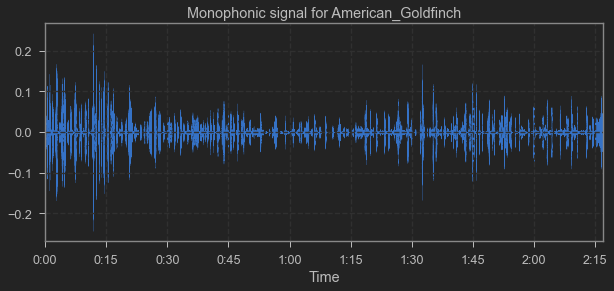

In [13]:
RawSignal(test)

In [16]:
# Linear-frequency power spectrogram
def Feq_Spectrogram(FILE):
    signal, sr = loadSignal(FILE, True, True)  
    plt.figure(figsize=(10, 4))
    spectra= librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(spectra, y_axis='linear', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Linear-frequency power spectrogram for {FILE[20:-13]}')
    plt.show()

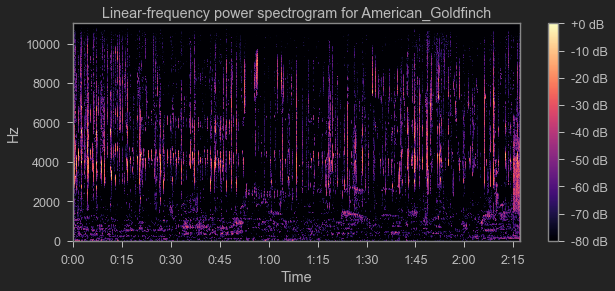

In [17]:
Feq_Spectrogram(test)

In [82]:
# Plot mel-spectrogram
def Mel_Spectrogram(FILE, N_FFT, HOP_LENGTH, WINDOW, FILTER=False, SAVE=False):
    FMIN = (1400 if FILTER else 0)
    signal, sr = loadSignal(FILE, True, True)  
    mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, htk=True, window=WINDOW, fmin=FMIN, fmax=sr/2) 
    fig, ax = plt.subplots(figsize=(10, 4))
    S_dB = librosa.power_to_db(mel**2,ref=np.max)
    librosa.display.specshow(S_dB, fmin=FMIN, y_axis='linear', x_axis='time')
    # mel frequency spectrogram add N_MELS to arg
#     librosa.display.specshow(S_dB, fmin=FMIN, x_axis='time', y_axis='mel') 
    plt.colorbar(format='%+2.0f dB')
    title = ('Mel-scaled spectrogram with high-pass filter' if FILTER else 'Mel-scaled spectrogram')
    plt.title(title+" for "+FILE[20:-13])
    if SAVE:
        ax.set_axis_off()
        fig.savefig(PATH)
    else:
        fig.colorbar(format='%+2.0f dB')
        plt.show()

In [26]:
def Mel_Spectrogram(FILE, N_FFT, HOP_LENGTH, WINDOW, FILTER=False):
    FMIN = (1400 if FILTER else 0)
    signal, sr = loadSignal(FILE, True, True)  
    mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, htk=True, window=WINDOW, fmin=FMIN, fmax=sr/2) 
    fig, ax = plt.subplots(figsize=(10, 4))
    S_dB = librosa.power_to_db(mel**2,ref=np.max)
    librosa.display.specshow(S_dB, fmin=FMIN)
    # mel frequency spectrogram add N_MELS to arg
#     librosa.display.specshow(S_dB, fmin=FMIN, x_axis='time', y_axis='mel') 

    plt.show()

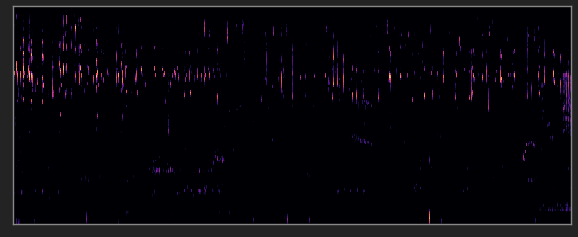

In [27]:
Mel_Spectrogram(test, 1024, 1024, 'hann', False)

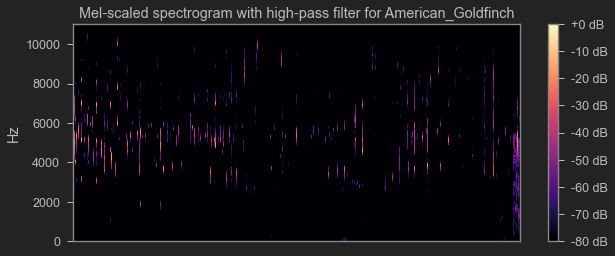

In [84]:
Mel_Spectrogram(test, 1024, 1024, 'hann', True)

In [86]:
# Mel-frequency cepstral coefficients (MFCCs)
def MFCC(FILE, N_FFT, N_MFCC, HOP_LENGTH, DCT=2, FILTER=False):
    LIFTER=(2*N_MFCC if FILTER else 0) # cesptral filtering
    signal, sr = loadSignal(FILE, True, True)  
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_fft = N_FFT, n_mfcc=N_MFCC, hop_length=HOP_LENGTH, htk=True, lifter=LIFTER, dct_type=DCT)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    title = ('MFCC with cepstral filtering' if FILTER else 'MFCC')
    ax.set(title=title+" for "+FILE[20:-13])
    plt.show()

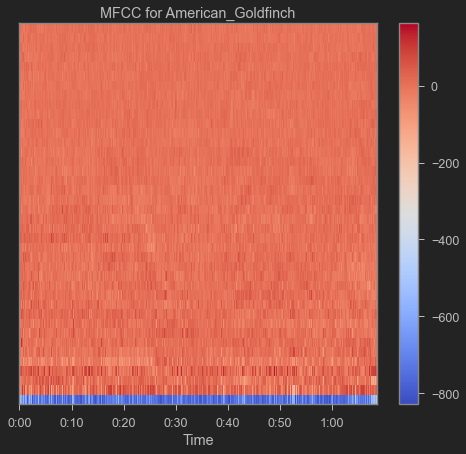

In [87]:
MFCC(test, 1024, 40, 1024)

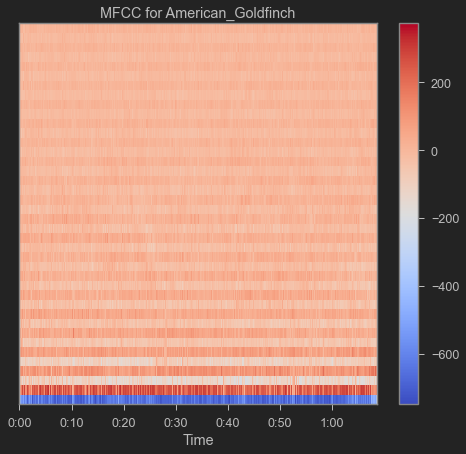

In [88]:
MFCC(test, 1024, 40, 1024, 3)

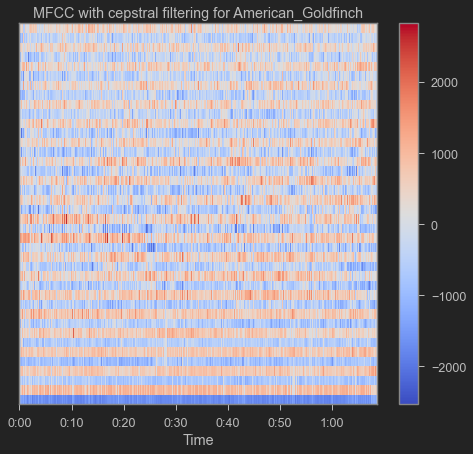

In [89]:
MFCC(test, 1024, 40, 1024, 3, True)

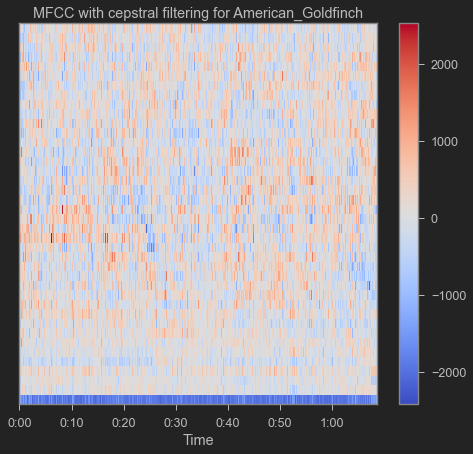

In [90]:
MFCC(test, 1024, 40, 1024, 2, True)